# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

# ANALISIS EXPLORATORIO DE  DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.hora_fin.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

In [5]:
data_2015.hora.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [8]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


In [9]:
data_2015.info()
data_2015.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


,periodo,fecha,hora,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2015,2015-01-01,0,Jueves,Alberdi,Liviano,NO COBRADO,15
1,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,1
2,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EXENTO,1
3,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,68
4,2015,2015-01-01,0,Jueves,Alberdi,Liviano,AUPASS,18
5,2015,2015-01-01,0,Jueves,Alberdi,Pesado,EFECTIVO,3
6,2015,2015-01-01,1,Jueves,Alberdi,Liviano,NO COBRADO,1
7,2015,2015-01-01,1,Jueves,Alberdi,Liviano,EFECTIVO,3
8,2015,2015-01-01,1,Jueves,Alberdi,Liviano,NO COBRADO,1
9,2015,2015-01-01,1,Jueves,Alberdi,Liviano,EXENTO,1


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [10]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())
print(data_2015['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']


VEO QUE : 
* 2015,2016,2017 Y 2018 COMPARTEN LAS MISMAS ESTACIONES
* 2019 SOLO TIENE DELLAPIENE EN VEZ DEL DELLAPIENE CENTRO Y LINIERS. ADEMAS, AGREGA PDB QUE NO ESTA EN EN LOS OTROS AÑOS

In [11]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print(data_2016['sentido'].unique())
#print(data_2015['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


DATA_2015 NO TIENE COLUMNA LLAMADA SENTIDO

In [12]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())
print(data_2015['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [13]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())
print(data_2015['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


VEO QUE : 
* 2017,2016 Y 2015 TIENE LA OPCION MONEDERO Y OTROS QUE NO ESTA EN LOS OTROS AÑOS
* 2015 Y 2016 POSEEN LA OPCION AUPASS, QUE NO ESTA EN LAS DEMAS
* COMPARTEN LAS MISMAS FORMAS_PAGO, SOLO QUE ESTAN EN DIFERENTE ORDEN, ADEMAS DE QUE 2019 TARJETA DISCAPACIDAD ESTA COMO T. DISCAPACIDAD.

##### Podemos decir entonces que los años  2016, 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

##### A diferencia, el dataset data_2015, posee las mismas columnas, excepto las columnas: 
-**hora_inicio y hora_fin** : Las cuales las reune en una sola columna llamada hora .

-**sentido**


Voy a trabajar con la estación **Illia** y la forma de pago **Efectivo**


In [14]:
data_2015 = data_2015.rename(columns = {'hora': 'hora_fin'}, inplace = False)
data_2015.head()

,periodo,fecha,hora_fin,dia,estacion,tipo_vehiculo,forma_pago,cantidad_pasos
0,2015,2015-01-01,0,Jueves,Alberdi,Liviano,NO COBRADO,15
1,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,1
2,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EXENTO,1
3,2015,2015-01-01,0,Jueves,Alberdi,Liviano,EFECTIVO,68
4,2015,2015-01-01,0,Jueves,Alberdi,Liviano,AUPASS,18


In [15]:
dataset = pd.concat([data_2019, data_2018, data_2017,data_2016,data_2015])

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:

#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas

dataefectivo = dataset.copy()

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataefectivo.estacion=='Illia', dataefectivo.forma_pago == 'EFECTIVO')
dataefectivo = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataefectivo.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataefectivo.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [18]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataefectivo['fecha2'] = pd.to_datetime(dataefectivo.fecha) + pd.to_timedelta(dataefectivo.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataefectivo.drop(columns=['fecha','hora_fin'], inplace = True)

dataefectivo.head(100)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00
...,...,...,...,...,...
1940,Viernes,Provincia,Liviano,368,2019-02-01 02:00:00
1945,Viernes,Provincia,Pesado,1,2019-02-01 02:00:00
2005,Viernes,Centro,Liviano,185,2019-02-01 03:00:00
2009,Viernes,Centro,Pesado,7,2019-02-01 03:00:00


In [19]:
#Corregimos el nombre de fecha2 a fecha
dataefectivo.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataefectivo.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [20]:
#Reordenamos el dataset por fecha
dataefectivo.sort_values('fecha', inplace = True)
dataefectivo.reset_index(drop=True, inplace = True)
dataefectivo

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Jueves,NaN,Liviano,3,2015-01-01 00:00:00
1,Jueves,NaN,Liviano,71,2015-01-01 00:00:00
2,Jueves,NaN,Pesado,1,2015-01-01 00:00:00
3,Jueves,NaN,Liviano,23,2015-01-01 01:00:00
4,Jueves,NaN,Liviano,926,2015-01-01 01:00:00
...,...,...,...,...,...
409252,Martes,Centro,Pesado,2,2019-12-31 22:00:00
409253,Martes,Centro,Liviano,580,2019-12-31 22:00:00
409254,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
409255,Martes,Centro,Liviano,214,2019-12-31 23:00:00


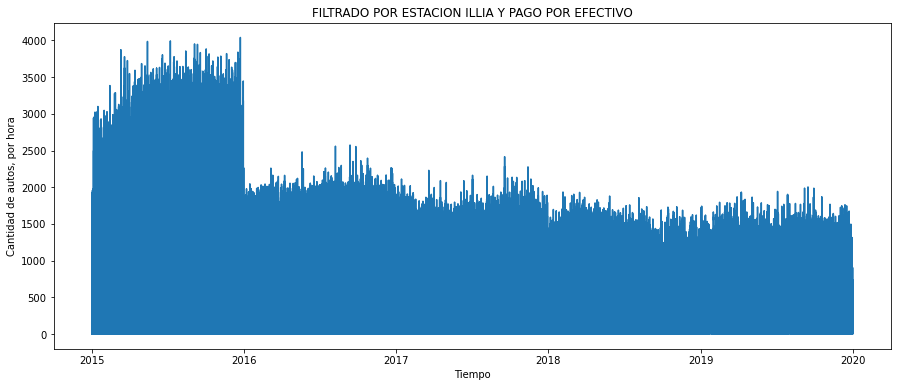

In [21]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataefectivo.fecha, dataefectivo.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO POR EFECTIVO')
plt.show()

OBSERVO UN CAMBIO BRUSCO ENTRE 2015 Y 2016, EN CANTIDAD DE PASOS

In [22]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataefectivo.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1826, 1)


,cantidad_pasos
fecha,
2015-01-01,25697
2015-01-02,38112
2015-01-03,27601
2015-01-04,33803
2015-01-05,48683


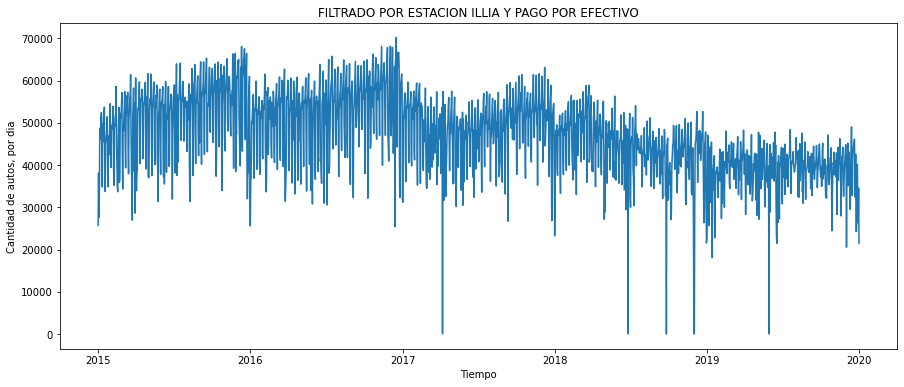

In [23]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO POR EFECTIVO')
plt.show()

ANALIZO POR ESTACION ILLIA Y FORMA DE PAGO TELEPASE

In [24]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
datatelepase = dataset.copy()
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(datatelepase.estacion=='Illia', datatelepase.forma_pago == 'TELEPASE')
datatelepase = datatelepase[mask]

#Quitamos las columnas que no vamos a utilizar
datatelepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

datatelepase.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [25]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
datatelepase['fecha2'] = pd.to_datetime(datatelepase.fecha) + pd.to_timedelta(datatelepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
datatelepase.drop(columns=['fecha','hora_fin'], inplace = True)

datatelepase.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [26]:
#Corregimos el nombre de fecha2 a fecha
datatelepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 
datatelepase.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [27]:
#Reordenamos el dataset por fecha
datatelepase.sort_values('fecha', inplace = True)
datatelepase.reset_index(drop=True, inplace = True)
datatelepase

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,275,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,459,2017-01-01 00:00:00
...,...,...,...,...,...
204607,Martes,Provincia,Liviano,600,2019-12-31 22:00:00
204608,Martes,Centro,Liviano,630,2019-12-31 22:00:00
204609,Martes,Provincia,Liviano,110,2019-12-31 23:00:00
204610,Martes,Centro,Liviano,122,2019-12-31 23:00:00


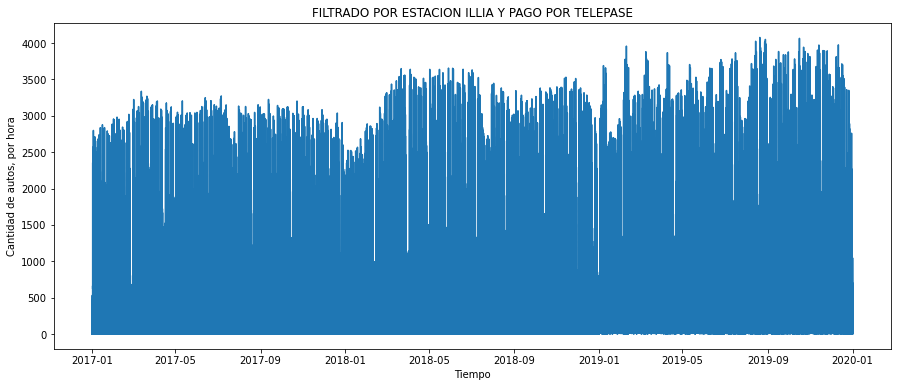

In [28]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(datatelepase.fecha, datatelepase.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO POR TELEPASE')
plt.show()

In [29]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diariot = datatelepase.resample('D', on = 'fecha').sum()
print(diariot.shape)
diariot.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


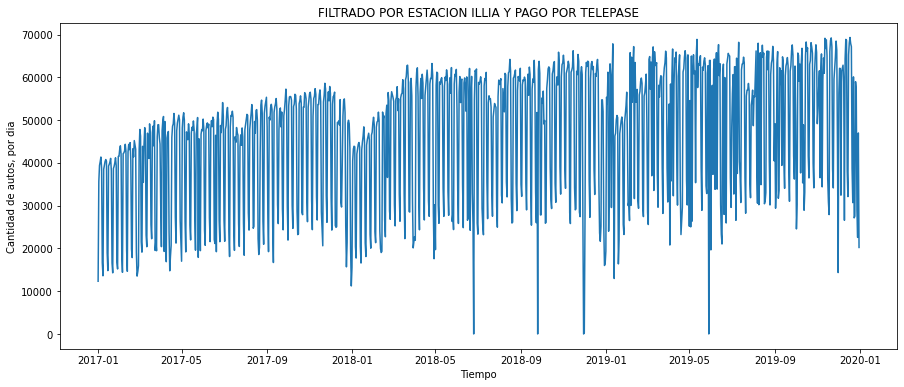

In [30]:
plt.figure(figsize = (15,6))
plt.plot(diariot.index, diariot.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO POR TELEPASE')
plt.show()

PUEDO OBSERVAR QUE EL GRAFICO DE LA CANTIDAD DE PASOS EN FUNCION DEL TIEMPO, CON PAGOS REALIZADOS POR TELEPASE 
POR ESTACIÓN ILLIA, TIENE TENDENCIA CRECIENTE.
MIENTRAS QUE EL GRAFICO DE LA CANTIDAD DE PASOS EN FUNCION DEL TIEMPO, CON PAGOS REALIZADOS POR EFECTIVO 
POR ESTACIÓN ILLIA, TIENE TENDENCIA DECRECIENTE.

In [31]:
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0.0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0.0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0.0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0.0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0.0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


ANALIZO POR ESTACION ILLIA Y TIPO DE VEHICULO LIVIANO

In [32]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataliviano = dataset.copy()
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataliviano.estacion=='Illia', dataliviano.tipo_vehiculo == 'Liviano')
dataliviano = dataliviano[mask]

#Quitamos las columnas que no vamos a utilizar
dataliviano.drop(columns = ['periodo','hora_inicio','forma_pago', 'tipo_vehiculo'], inplace = True)

dataliviano.head()

,fecha,hora_fin,dia,estacion,sentido,cantidad_pasos
19,2019-01-01,1,Martes,Illia,Centro,146
20,2019-01-01,1,Martes,Illia,Centro,59
22,2019-01-01,1,Martes,Illia,Provincia,147
23,2019-01-01,1,Martes,Illia,Provincia,106
80,2019-01-01,2,Martes,Illia,Centro,537


In [33]:
dataliviano['fecha2'] = pd.to_datetime(dataliviano.fecha) + pd.to_timedelta(dataliviano.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataliviano.drop(columns=['fecha','hora_fin'], inplace = True)

dataliviano.head()

,dia,estacion,sentido,cantidad_pasos,fecha2
19,Martes,Illia,Centro,146,2019-01-01 01:00:00
20,Martes,Illia,Centro,59,2019-01-01 01:00:00
22,Martes,Illia,Provincia,147,2019-01-01 01:00:00
23,Martes,Illia,Provincia,106,2019-01-01 01:00:00
80,Martes,Illia,Centro,537,2019-01-01 02:00:00


In [34]:
#Corregimos el nombre de fecha2 a fecha
dataliviano.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataliviano.head()

,dia,estacion,sentido,cantidad_pasos,fecha
19,Martes,Illia,Centro,146,2019-01-01 01:00:00
20,Martes,Illia,Centro,59,2019-01-01 01:00:00
22,Martes,Illia,Provincia,147,2019-01-01 01:00:00
23,Martes,Illia,Provincia,106,2019-01-01 01:00:00
80,Martes,Illia,Centro,537,2019-01-01 02:00:00


In [35]:
#Reordenamos el dataset por fecha
dataliviano.sort_values('fecha', inplace = True)
dataliviano.reset_index(drop=True, inplace = True)
dataliviano

,dia,estacion,sentido,cantidad_pasos,fecha
0,Jueves,Illia,NaN,192,2015-01-01 00:00:00
1,Jueves,Illia,NaN,86,2015-01-01 00:00:00
2,Jueves,Illia,NaN,2,2015-01-01 00:00:00
3,Jueves,Illia,NaN,3,2015-01-01 00:00:00
4,Jueves,Illia,NaN,7,2015-01-01 00:00:00
...,...,...,...,...,...
594130,Martes,Illia,Centro,3,2019-12-31 23:00:00
594131,Martes,Illia,Centro,4,2019-12-31 23:00:00
594132,Martes,Illia,Centro,1,2019-12-31 23:00:00
594133,Martes,Illia,Centro,214,2019-12-31 23:00:00


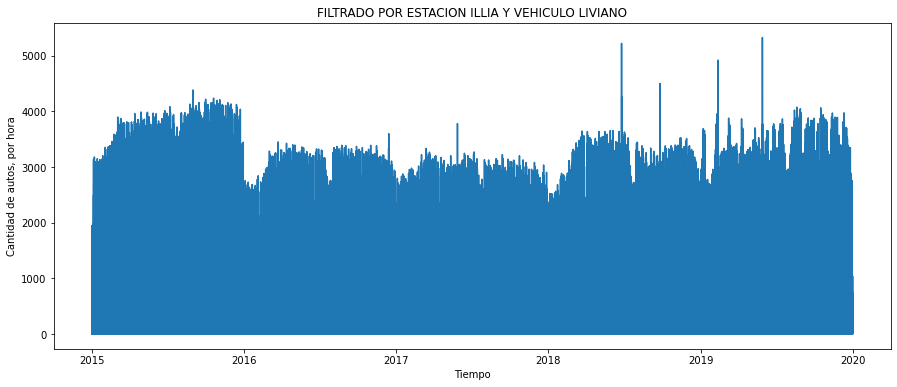

In [36]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataliviano.fecha, dataliviano.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('FILTRADO POR ESTACION ILLIA Y VEHICULO LIVIANO')
plt.show()

PUEDO OBERVAR ALGUNOS VALORES ATIPICOS 

In [37]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diariol = dataliviano.resample('D', on = 'fecha').sum()
print(diariol.shape)
diariol.head()

(1826, 1)


,cantidad_pasos
fecha,
2015-01-01,34728
2015-01-02,54216
2015-01-03,35548
2015-01-04,43328
2015-01-05,78325


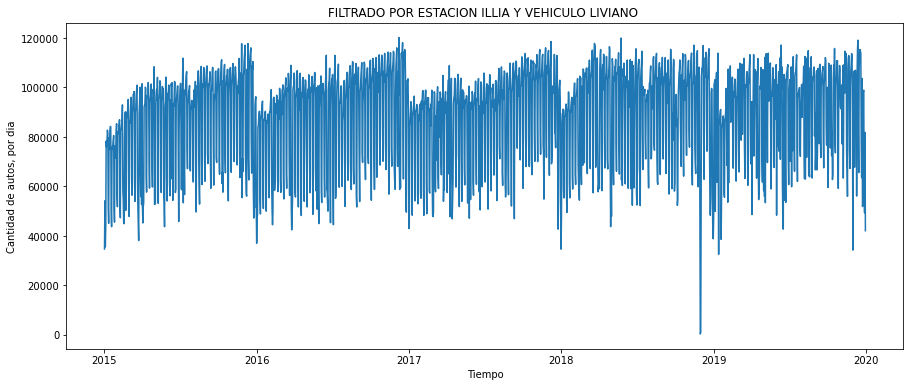

In [38]:
plt.figure(figsize = (15,6))
plt.plot(diariol.index, diariol.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y VEHICULO LIVIANO ')
plt.show()

A SIMPLE VISTA NO OBSERVO UNA TENDENCIA DE LA SERIE , PERO SI PUEDO OBSREVAR PERFECTAMENTE SU ESTACIONALIDAD. EN CADA AÑO
SE VE UNA TENDENCIA CRECIENTE HASTA EL PROXIMO AÑO, EN DONDE DECRECE Y CRECE HASTA EL PROXIMO, Y ASI CONTINUA.

AHORA PRUEBO CON ESTACION ILLIA Y VEHICULO PESADO 

In [39]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
datapesado = dataset.copy()
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(datapesado.estacion=='Illia', datapesado.tipo_vehiculo == 'Pesado')
datapesado = datapesado[mask]

#Quitamos las columnas que no vamos a utilizar
datapesado.drop(columns = ['periodo','hora_inicio','forma_pago', 'tipo_vehiculo'], inplace = True)

datapesado.head()

,fecha,hora_fin,dia,estacion,sentido,cantidad_pasos
21,2019-01-01,1,Martes,Illia,Centro,1
24,2019-01-01,1,Martes,Illia,Provincia,3
25,2019-01-01,1,Martes,Illia,Provincia,2
86,2019-01-01,2,Martes,Illia,Centro,1
87,2019-01-01,2,Martes,Illia,Centro,6


In [40]:
datapesado['fecha2'] = pd.to_datetime(datapesado.fecha) + pd.to_timedelta(datapesado.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
datapesado.drop(columns=['fecha','hora_fin'], inplace = True)

datapesado.head()

,dia,estacion,sentido,cantidad_pasos,fecha2
21,Martes,Illia,Centro,1,2019-01-01 01:00:00
24,Martes,Illia,Provincia,3,2019-01-01 01:00:00
25,Martes,Illia,Provincia,2,2019-01-01 01:00:00
86,Martes,Illia,Centro,1,2019-01-01 02:00:00
87,Martes,Illia,Centro,6,2019-01-01 02:00:00


In [41]:
#Corregimos el nombre de fecha2 a fecha
datapesado.rename(columns = {'fecha2':'fecha'}, inplace = True) 
datapesado.head()

,dia,estacion,sentido,cantidad_pasos,fecha
21,Martes,Illia,Centro,1,2019-01-01 01:00:00
24,Martes,Illia,Provincia,3,2019-01-01 01:00:00
25,Martes,Illia,Provincia,2,2019-01-01 01:00:00
86,Martes,Illia,Centro,1,2019-01-01 02:00:00
87,Martes,Illia,Centro,6,2019-01-01 02:00:00


In [42]:
#Reordenamos el dataset por fecha
datapesado.sort_values('fecha', inplace = True)
datapesado.reset_index(drop=True, inplace = True)
datapesado

,dia,estacion,sentido,cantidad_pasos,fecha
0,Jueves,Illia,NaN,1,2015-01-01 00:00:00
1,Jueves,Illia,NaN,1,2015-01-01 00:00:00
2,Jueves,Illia,NaN,1,2015-01-01 00:00:00
3,Jueves,Illia,NaN,4,2015-01-01 01:00:00
4,Jueves,Illia,NaN,2,2015-01-01 01:00:00
...,...,...,...,...,...
654516,Martes,Illia,Provincia,4,2019-12-31 22:00:00
654517,Martes,Illia,Centro,4,2019-12-31 22:00:00
654518,Martes,Illia,Centro,2,2019-12-31 22:00:00
654519,Martes,Illia,Centro,2,2019-12-31 22:00:00


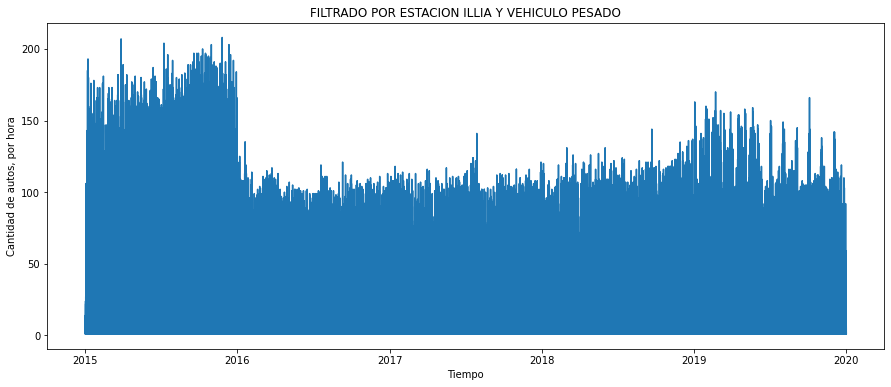

In [43]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(datapesado.fecha, datapesado.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('FILTRADO POR ESTACION ILLIA Y VEHICULO PESADO')
plt.show()

In [44]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diariop = datapesado.resample('D', on = 'fecha').sum()
print(diariop.shape)
diariop.head()

(1826, 1)


,cantidad_pasos
fecha,
2015-01-01,797
2015-01-02,3486
2015-01-03,2277
2015-01-04,1820
2015-01-05,4779


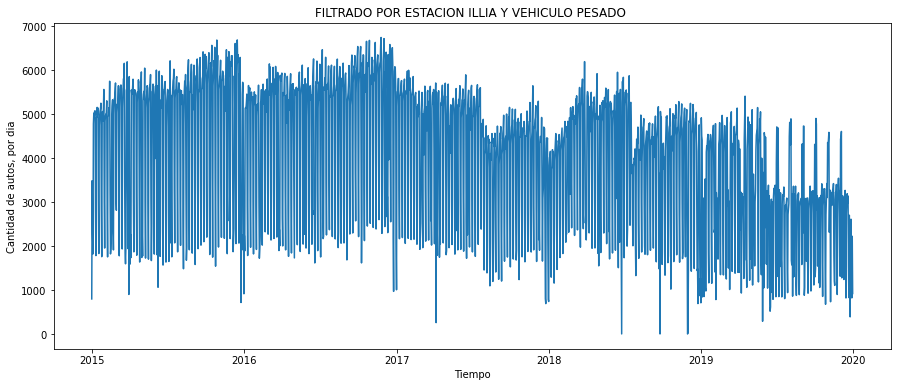

In [45]:
plt.figure(figsize = (15,6))
plt.plot(diariop.index, diariop.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y VEHICULO PESADO ')
plt.show()

AQUI SI PUEDO OBSERVAR UNA TENDENCIA DECRECIENTE.

### TRANSORMACIÓ DE LOS DATOS 
COMO PUDIMOS OBSERVAR, SI ES NECESARIO APLICAR CAMBIOS A LOS DATOS DE NUESTRO DATASET. PODEMOS ARMAR UNA COLUMNA NUEVA LA CUAL 
SE DENOMINE 'FECHA', CON LA CUAL JUNTAMOS TODA LA INFORMACION DE LAS COLUMNAS 'PERIODO','FECHA' Y 'HORA_FIN', CON LO QUE LUEGO
PODEMOS ELIMINAR DICHAS COLUMNAS. 
POR OTRO LADO VEMOS QUE HORA_INICIO TAMPOCO APORTA MUCHA INFORMACION IMPORTANTE A NUESTRO ESTUDIO. 

In [46]:
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0.0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0.0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0.0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0.0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0.0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


VOY A TRABAJAR CON ILLLIA Y PAGO EN EFECTIVO YA QUE OBSERVE BUENA TENDENCIA Y ESACIONALIDAD

In [47]:
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
data_efectivo = dataset[mask]


data_efectivo.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,1.0,2,Martes,Illia,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,1.0,2,Martes,Illia,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,1.0,2,Martes,Illia,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,1.0,2,Martes,Illia,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,2.0,3,Martes,Illia,Centro,Liviano,EFECTIVO,769


In [48]:
data_efectivo['fecha2'] = pd.to_datetime(data_efectivo.fecha) + pd.to_timedelta(data_efectivo.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_efectivo.drop(columns=['fecha','hora_fin','periodo','hora_inicio','estacion','forma_pago'], inplace = True)

data_efectivo.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [49]:
data_efectivo.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_efectivo.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [50]:
data_efectivo.sort_values('fecha', inplace = True)
data_efectivo.reset_index(drop=True, inplace = True)
data_efectivo

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Jueves,NaN,Liviano,3,2015-01-01 00:00:00
1,Jueves,NaN,Liviano,71,2015-01-01 00:00:00
2,Jueves,NaN,Pesado,1,2015-01-01 00:00:00
3,Jueves,NaN,Liviano,23,2015-01-01 01:00:00
4,Jueves,NaN,Liviano,926,2015-01-01 01:00:00
...,...,...,...,...,...
409252,Martes,Centro,Pesado,2,2019-12-31 22:00:00
409253,Martes,Centro,Liviano,580,2019-12-31 22:00:00
409254,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
409255,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [51]:
data_efectivo.isna().sum()

dia                   0
sentido           62691
tipo_vehiculo         0
cantidad_pasos        0
fecha                 0
dtype: int64

In [52]:
diario = data_efectivo.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1826, 1)


,cantidad_pasos
fecha,
2015-01-01,25697
2015-01-02,38112
2015-01-03,27601
2015-01-04,33803
2015-01-05,48683


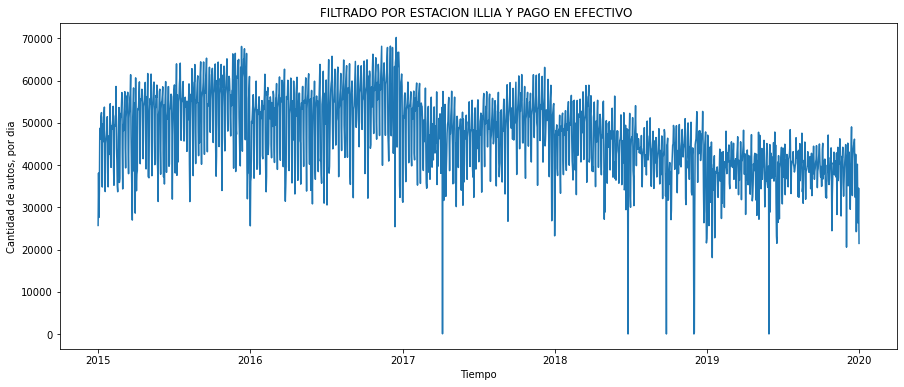

In [53]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO EN EFECTIVO ')
plt.show()

In [54]:
index = pd.DataFrame(diario.index)
index.shape

(1826, 1)

In [55]:
date_check = index.diff()
date_check.value_counts()

fecha 
1 days    1825
dtype: int64

PUEDO OBSERVAR QUE **NO HAY DATOS FALTANTES**, TIENE 1826 ELEMENTOS Y LA RESTA DIO 1825, NO FALTA NINGUN DIA.

**RECORTO OUTLIERS** 

In [56]:
diario.cantidad_pasos[diario.cantidad_pasos < 10000] = np.nan

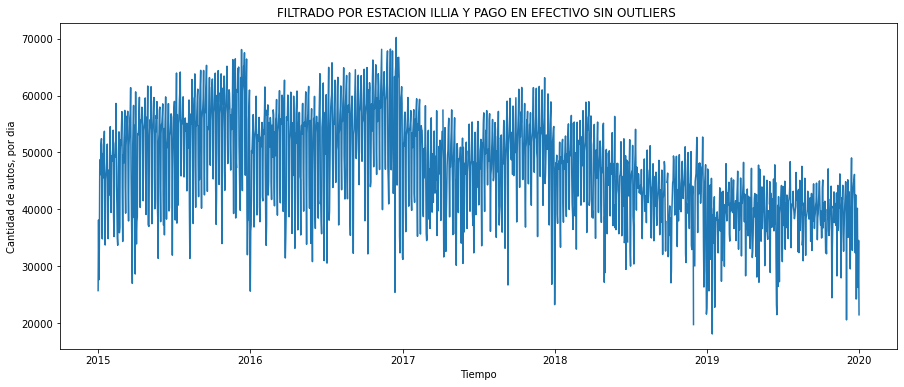

In [57]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO EN EFECTIVO SIN OUTLIERS ')
plt.show()

OBSRVO COMO SE FUERON LOS OUTLIERS 

In [58]:
diario.isna().sum()

cantidad_pasos    6
dtype: int64

**IMPUTO LOS VALORES MIRANDO UN DIA ANTES Y OTRO DESPUES** 

In [59]:
diario= diario.interpolate()

In [60]:
diario.isna().sum()

cantidad_pasos    0
dtype: int64

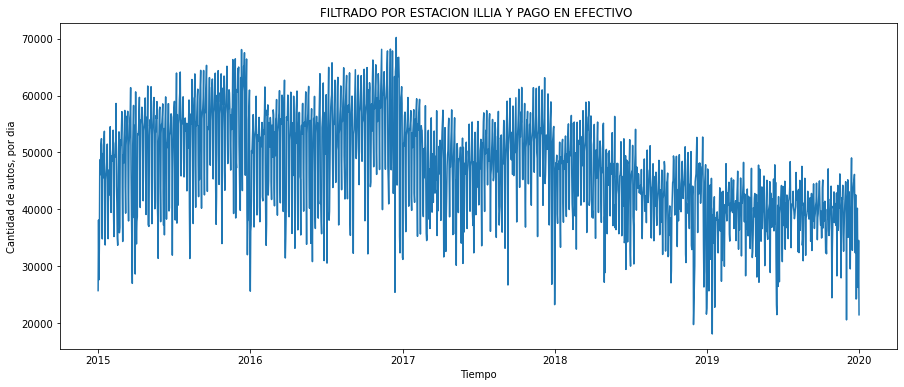

In [61]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title('FILTRADO POR ESTACION ILLIA Y PAGO EN EFECTIVO ')
plt.show()

OBSERVO QUE EL GRAFICO SE MANTUVO IGUAL LUEGO DE IMPUTAR LOS NANS 

In [62]:
ventana = int(365)
cantidad_pasos_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
cantidad_pasos_tendencia # AGARRO LA VENTANA DE TIEMPO QUE CORRESPONDE A SEMANAS EN 2 AÑOS , 365*2

fecha
2015-01-01   NaN
2015-01-02   NaN
2015-01-03   NaN
2015-01-04   NaN
2015-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1826, dtype: float64

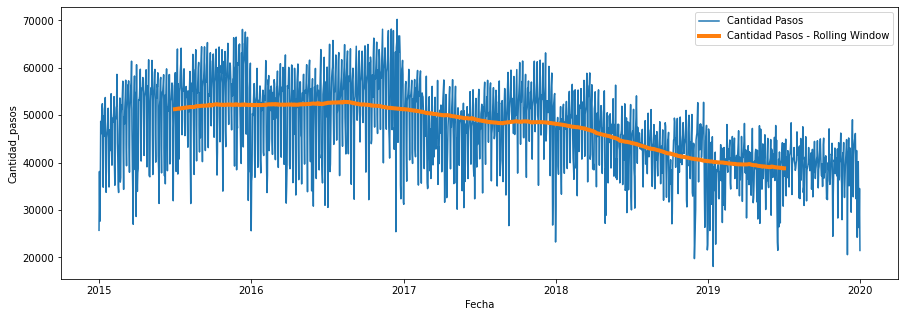

In [63]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad Pasos')
plt.plot(cantidad_pasos_tendencia, lw = 4, label = 'Cantidad Pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad_pasos')
plt.legend()
plt.show()

USO LA LIBRERIA STATS MODELS 

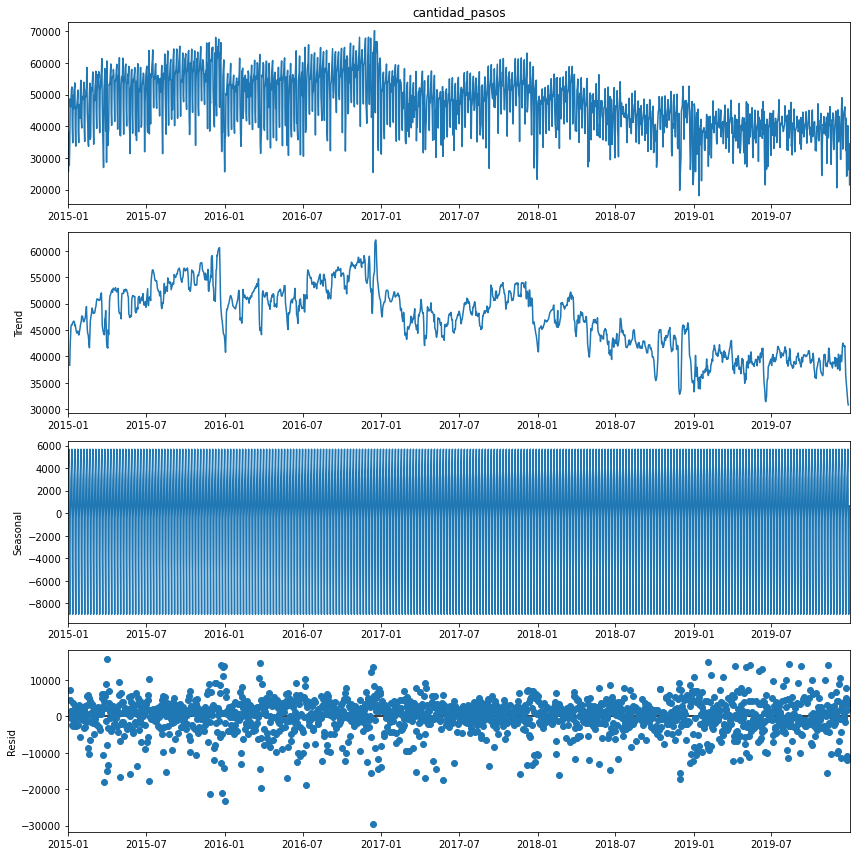

In [64]:
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [65]:
result.trend

fecha
2015-01-01             NaN
2015-01-02             NaN
2015-01-03             NaN
2015-01-04    38323.142857
2015-01-05    42009.571429
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1826, dtype: float64

# MODELOS MACHINE LEARNING



### ONE STEP PREDICTION WITH RANDOM FOREST REGRESSOR

In [66]:
senial = diario.cantidad_pasos
senial.tail()

fecha
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    21447.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [67]:
len(senial)

1826

In [68]:
look_back = 365 # USO LA CANTIDAD DE DIAS DE UN AÑO PARA PREDECIR EL VALOR SIGUIENTE

In [69]:
#CREO X E Y PARA LUEGO LLENARLOS
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1460, 365) (1460,)


In [70]:
#LLENO X E Y CON LOS VALORES DE SENIAL
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [71]:
print(X)

[[25697. 38112. 27601. ... 58460. 60960. 33811.]
 [38112. 27601. 33803. ... 60960. 33811. 25602.]
 [27601. 33803. 48683. ... 33811. 25602. 36136.]
 ...
 [47832. 35446. 21559. ... 24349. 38168. 40182.]
 [35446. 21559. 22599. ... 38168. 40182. 30681.]
 [21559. 22599. 27038. ... 40182. 30681. 26259.]]


In [72]:
print(y)

[25602. 36136. 37225. ... 30681. 26259. 34523.]


PUEDO NOTAR QUE LAS FECHAS YA NO SON PARTE DE MIS DATOS 

In [73]:
# HAGO EL TRAIN TEST SPLIT
N_total = X.shape[0] 
N_train = int(0.8*N_total) # cantidad de instancias que vamos a usar para entrenar. 
N_test = N_total-N_train #cantidad de puntos que vamos a usar para evaluar


length_total = N_total + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1168, 365) (1168,)
(292, 365) (292,)


ENTRENO MI MODELO 

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

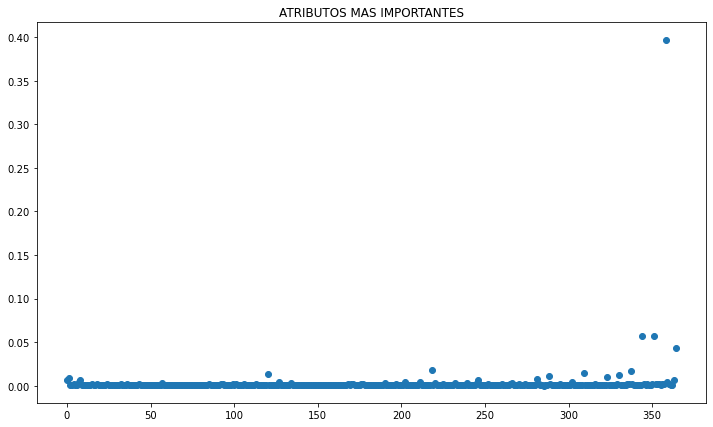

In [75]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.title('ATRIBUTOS MAS IMPORTANTES')
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

OBSERVO EN EL EJE X LOS 365 DIAS QUE DEFINI DE VENTANA, Y LOS ATRIBUTOS MAS IMPORTANTES LOS ENCUENTRO A PRINCIPIO DE MES,
VEO QUE CERCA DE 0 HAY UN ATRIBUTO IMPORTANTE, LUEGO CERCA DE 120 HAY OTRO, LUEGO EN 180 TAMBIEN, LOS CUALES SON DIAS DE INICIO
DE MES.

In [76]:
#HAGO LA PREDICCION
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

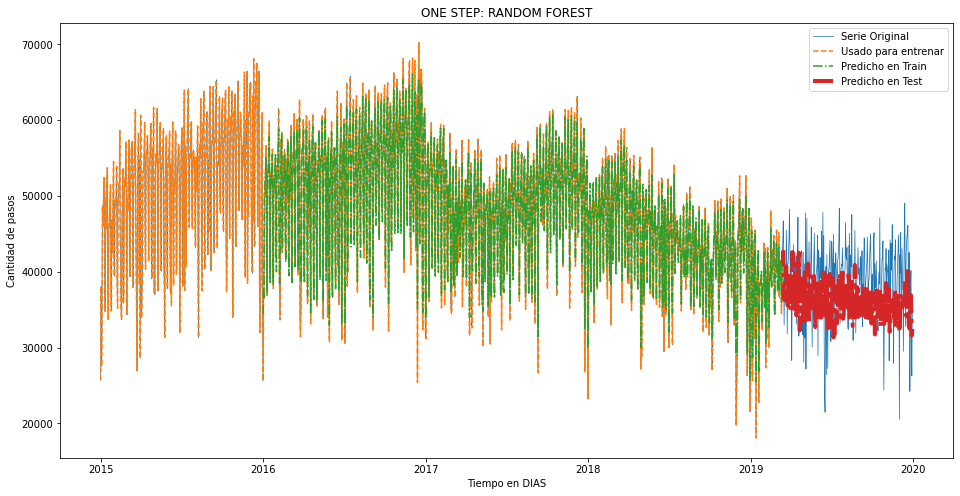

In [77]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo en DIAS')
plt.ylabel('Cantidad de pasos')
plt.title('ONE STEP: RANDOM FOREST')
plt.show()


OBSERVO QUE LA PRDICCION EN TEST, LA CUAL ES LA QUE ME INTERESA OBSERVAR, NO LLEGA A PREDECIR BIEN DE EXTREMO
A EXTREMO LA SEÑAL ORIGINAL. 

In [78]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1872.7643465826739
Error en Test: 5436.6662125530665


OBSRVO QUE EL ERROR DE TEST, ES MUCHO MAS ALTO QUE EL ERROR DE TRAIN, LO CUAL ME INDICA UN OVERFITTING 

OBSERVO QUE EL MODELO MEJORA LA PREDICCION, YA QUE EL MODELO POSEE UN MENOR ERROR DE TEST QUE EL BENCHMARK

### Multi-Step Prediction with Random Forest Regressor

In [79]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

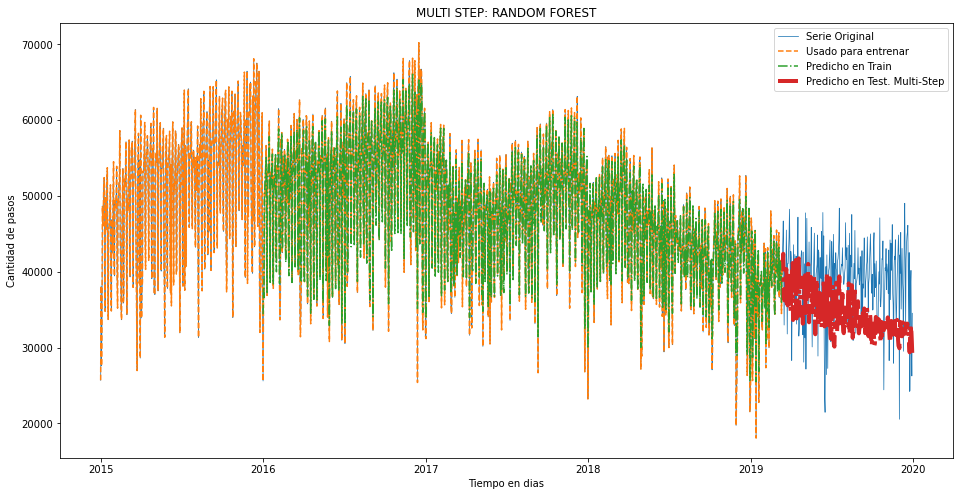

In [80]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo en dias')
plt.ylabel('Cantidad de pasos')
plt.title('MULTI STEP: RANDOM FOREST')
plt.show()

SIGO OBSERVNADO LO MISMO, LA PREDICCION NO LLEGA A IMITAR DE EXTREMO A EXTREMO A LA SEÑAL ORIGINAL

In [81]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 6779.502794712762


### ONE STEP WITH LINEAR REGRESSOR

In [82]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred_lin = lr.predict(X)
y_train_predlin = lr.predict(X_train)
y_test_predlin = lr.predict(X_test)

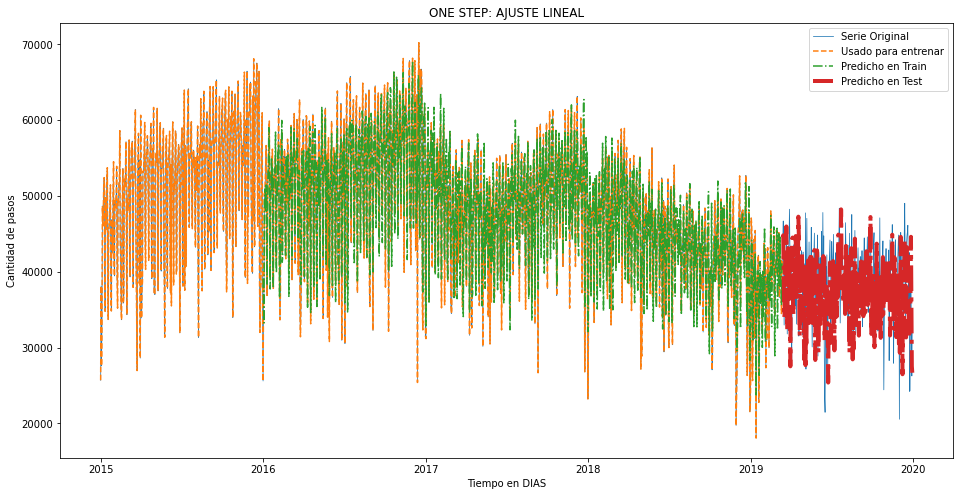

In [84]:
plt.figure(figsize=(16,8))

plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(senial.index[look_back: look_back + N_train], y_train_predlin,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_predlin,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo en DIAS')
plt.ylabel('Cantidad de pasos')
plt.title('ONE STEP: AJUSTE LINEAL')
plt.show()


In [85]:
MSE = mean_squared_error(y_train, y_train_predlin)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_predlin)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 4017.6185745331927
Error en Test: 5791.878978877936


### MULTI STEP WITH LINEARREGRESSOR

In [86]:
y_ms_test_pred_lin = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = lr.predict(x.reshape(1,-1))
    y_ms_test_pred_lin.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred_lin = np.array(y_ms_test_pred_lin)

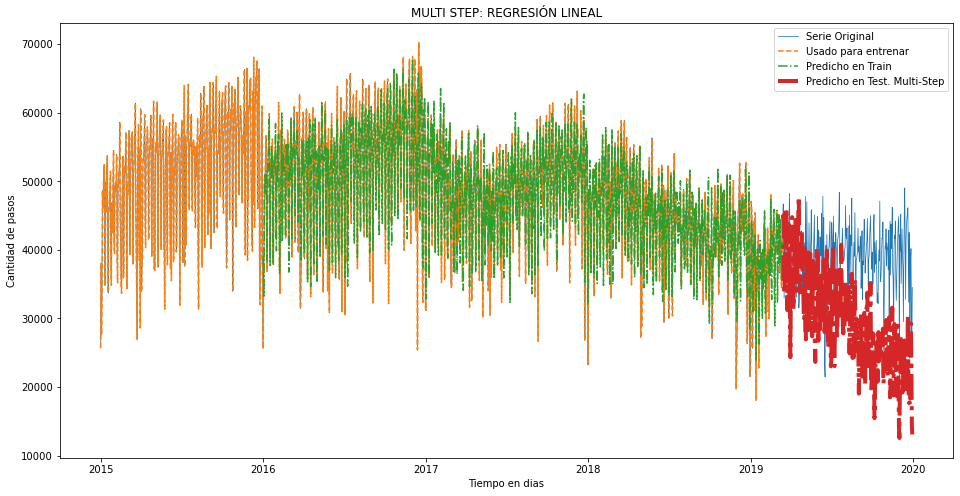

In [87]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_predlin,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred_lin,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo en dias')
plt.ylabel('Cantidad de pasos')
plt.title('MULTI STEP: REGRESIÓN LINEAL')
plt.show()

In [88]:
MSE = mean_squared_error(y_test, y_ms_test_pred_lin)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 11697.896771769685


### APLICO RIDGE

In [89]:
from sklearn.linear_model import Ridge
train=[]
test=[]
n=[]
i=0
for alpha in [1e4,1e6,1e8,1e9,1e10,1e11,1e12,1e14,1e16,1e20]: # A MEDIDA QUE EL ALPHA SE ACHICA, EL MODELO SE PARECE MAS AL INICIAL, DE REGRESION LINEAL
    reg_ridge = Ridge(alpha=alpha)
    reg_ridge.fit(X_train, y_train)
    #print(f'Pendientes : {reg_ridge.coef_}')
    #print(f'Ordenadas : {reg_ridge.intercept_}')
    y_train_pred= reg_ridge.predict(X_train)
    y_test_pred = reg_ridge.predict(X_test)
    error_train =np.sqrt(mean_squared_error(y_train, y_train_pred))
    error_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'error de train con alpha de {alpha}  es de {error_train}')
    print(f'error de test con alpha de {alpha} es de {error_test} \n') 
    i=i+1
    n.append(alpha)
    train.append(error_train)
    test.append(error_test)
#LUEGO CON EL ALPHA QUE ME DE MENOR ERROR, PUEDO VER LOS PARAMTEROS DE MI POLINOMIO

error de train con alpha de 10000.0  es de 4017.6185745338507
error de test con alpha de 10000.0 es de 5791.877797273776 

error de train con alpha de 1000000.0  es de 4017.618581102581
error de test con alpha de 1000000.0 es de 5791.760848567168 

error de train con alpha de 100000000.0  es de 4017.681259994293
error de test con alpha de 100000000.0 es de 5780.356896529075 

error de train con alpha de 1000000000.0  es de 4022.0994455239534
error de test con alpha de 1000000000.0 es de 5696.682344909742 

error de train con alpha de 10000000000.0  es de 4130.7153571936005
error de test con alpha de 10000000000.0 es de 5415.7099808869825 

error de train con alpha de 100000000000.0  es de 4657.307636362315
error de test con alpha de 100000000000.0 es de 5274.192813294489 

error de train con alpha de 1000000000000.0  es de 5463.945357315602
error de test con alpha de 1000000000000.0 es de 4632.723446479409 

error de train con alpha de 100000000000000.0  es de 8378.737612967925
error d

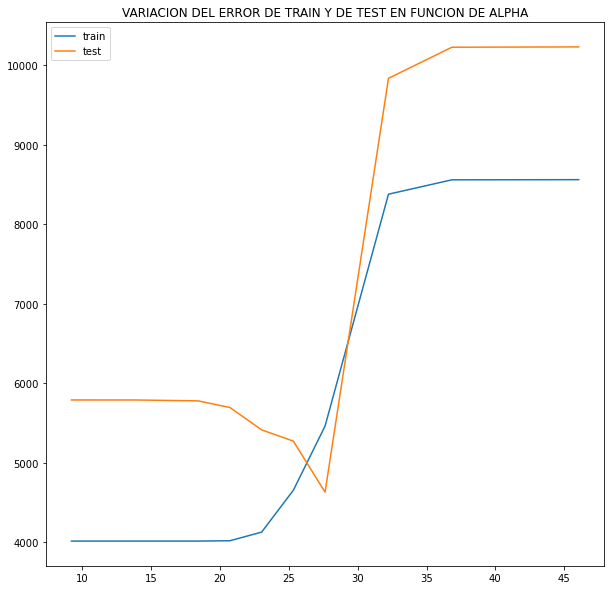

In [90]:
plt.figure(figsize=(10,10))
plt.plot(np.log(n),train,label='train')
plt.plot(np.log(n),test,label='test')
plt.title("VARIACION DEL ERROR DE TRAIN Y DE TEST EN FUNCION DE ALPHA")
plt.legend()

In [91]:
min(np.asarray(test))

4632.723446479409

OBSERVANDO ESTO PUEDO DECIR QUE EL MEJOR MODELO DE RIDGE SE CORRESPONDE CON UN ALPHA DE 1e12, DANDO UN ERROR DE: 
- RMSE train: 5463
- RMSE test: 4632

### COMPARACIÓN CON BENCHMARK
Comparo el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [92]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

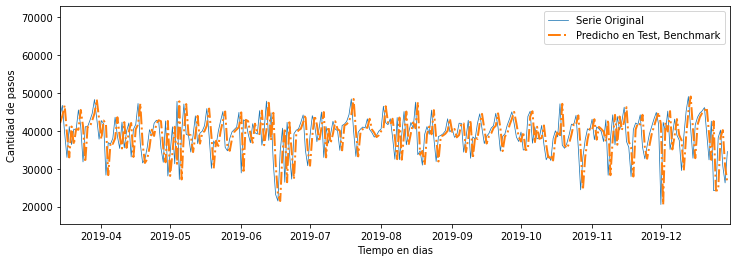

In [93]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo en dias')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [94]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

6379.796300882453


OBSERVO QUE EL ERROR DE TEST EN EL BENCHMARK, ES MUCHO MAS ALTO QUE LOS MODELOS ANTERIORMENTE PLANTEADOS, POR LO TANTO
SIGNIFICA QUE MEJORAN LA PREDICCION.

#### OBSERVACIONES SOBRE LOS MODELOS

- OBSERVO QUE EL **ERROR DE TEST ES MAYOR EN EL RANDOMFOREST QUE EN EL LINEARREGRESSOR**. 
- ADEMAS, EL EL LINEARREGRESSOR OBTIENE UNA MENOR DIFERENCIA ENTRE TRAIN Y TEST, **EVITANDO ASI EL OVERFITTING** QUE OCURRE EN   EL MODELO RANDOMFOREST. 
- POR LO TANTO OBSERVANDO ESTO PUEDO DECIR QUE EL MODELO **LINEARREGRESSOR** BRINDA MEJORES RESULTADOS 

## OPTIMIZACION DE HIPERPARAMETROS : GRID SEARCH

#### RANDOM FOREST

In [95]:
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
randomforest  = RandomForestRegressor()
param_grid_randomForest = {'n_estimators': [10,100,500,1000],
              'max_depth':[1,5,20,40],
              'min_samples_leaf' :sp.stats.randint(1, 5)}

In [299]:
randomForest_optimizado = RandomizedSearchCV(randomforest,param_grid_randomForest,n_iter=3,random_state=42,cv=4,n_jobs=-1)
randomForest_optimizado.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 20, 40],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D822820B50>,
                                        'n_estimators': [10, 100, 500, 1000]},
                   random_state=42)

In [300]:
print("Mejores parametros: "+str(randomForest_optimizado.best_params_))
print("Mejor Score: "+str(randomForest_optimizado.best_score_)+'\n')

scores = pd.DataFrame(randomForest_optimizado.cv_results_)
scores

Mejores parametros: {'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 1000}
Mejor Score: 0.4554411122290726



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.464687,0.044052,0.002607,0.000422,20,4,10,"{'max_depth': 20, 'min_samples_leaf': 4, 'n_es...",0.588419,0.501548,0.526390,0.156406,0.443191,0.168571,2
1,161.461479,3.104788,0.140194,0.014705,20,3,1000,"{'max_depth': 20, 'min_samples_leaf': 3, 'n_es...",0.612153,0.553608,0.565744,0.090259,0.455441,0.211967,1
2,11.782543,0.420826,0.053562,0.006527,1,1,500,"{'max_depth': 1, 'min_samples_leaf': 1, 'n_est...",0.363332,0.377063,0.352675,-0.298127,0.198736,0.286994,3


In [301]:
prediction = randomForest_optimizado.predict(X_test)
predictionreal = randomForest_optimizado.predict(X_train)

In [302]:
error_train = np.sqrt(mean_squared_error(y_train, predictionreal))
error_test = np.sqrt(mean_squared_error(y_test, prediction))
print(f'error de train es de {error_train}')
print(f'error de test es de {error_test} \n') 

error de train es de 2333.6158990846575
error de test es de 5374.177000530387 



POR LO TANTO EL MEJOR MODELO ES EL DE RANDOMFORESTREGRESSOR CON LOS SIGUIENTES ATRIBUTOS:
- max_depth =20 
- min_samples_leaf: 3
- n_estimators': 1000

#### RIDGE 

In [95]:
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
reg_ridge = Ridge()
param_grid_ridge = {'alpha': [3e11,6e11,8e11,1e12,3e12,5e12,8e12]} 

In [96]:
ridge_optimizado = RandomizedSearchCV(reg_ridge,param_grid_ridge,n_iter=3,random_state=42,cv=4,n_jobs=-1)
ridge_optimizado.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=Ridge(), n_iter=3, n_jobs=-1,
                   param_distributions={'alpha': [300000000000.0,
                                                  600000000000.0,
                                                  800000000000.0,
                                                  1000000000000.0,
                                                  3000000000000.0,
                                                  5000000000000.0,
                                                  8000000000000.0]},
                   random_state=42)

In [97]:
print("Mejores parametros: "+str(ridge_optimizado.best_params_))
print("Mejor Score: "+str(ridge_optimizado.best_score_)+'\n')

scores = pd.DataFrame(ridge_optimizado.cv_results_)
scores

Mejores parametros: {'alpha': 300000000000.0}
Mejor Score: 0.3756108604426651



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070299,0.036387,0.001504,0.000506,300000000000.0,{'alpha': 300000000000.0},0.551602,0.506115,0.541049,-0.096323,0.375611,0.272991,1
1,0.034828,0.006330,0.000904,0.000581,600000000000.0,{'alpha': 600000000000.0},0.495986,0.483278,0.507248,-0.426705,0.264952,0.399418,2
2,0.035304,0.002349,0.001185,0.000537,5000000000000.0,{'alpha': 5000000000000.0},0.106870,0.258454,0.262521,-1.514191,-0.221586,0.748918,3


In [98]:
predictionr = ridge_optimizado.predict(X_test)
predictionrealr = ridge_optimizado.predict(X_train)

In [99]:
error_train_r = np.sqrt(mean_squared_error(y_train, predictionrealr))
error_test_r = np.sqrt(mean_squared_error(y_test, predictionr))
print(f'error de train es de {error_train_r}')
print(f'error de test es de {error_test_r} \n') 

error de train es de 4992.722357192496
error de test es de 5104.648426378422 



In [100]:
ridge_optimizado.best_estimator_

Ridge(alpha=300000000000.0)

## MODELO FINAL: 

#### FINALMENTE ELIJO MI MODELO DE REGRESION LINEAL CON REGULARIZACIÓN DE RIDGE, UTILIZANDO UN ALPHA DE 300000000000 

#### ¿ QUE INFORMACION ESTA USANDO EL MODELO PARA PREDECIR ?

In [ ]:
#Grafico de dispersion
plt.figure(figsize = (12,7))
plt.scatter(np.arange(diario_ridge.coef_.size),diario_ridge.coef_)
for X in np.arange(13)*30.42:
     plt.axvline(X, linestyle ='--', color= 'r')
plt.title('Importancia de los atributos')
plt.show()


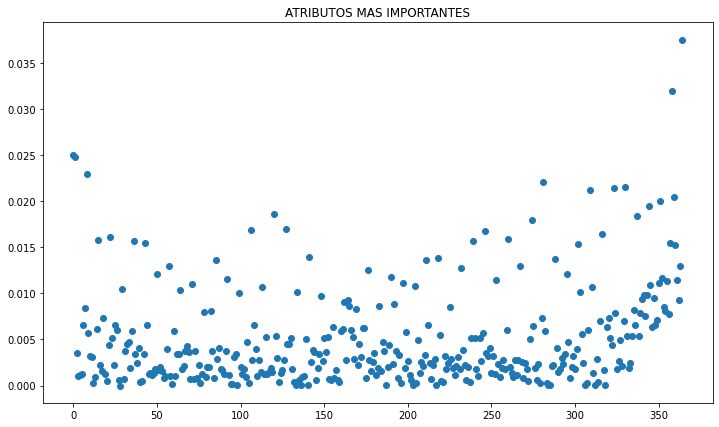

In [124]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(ridge_optimizado.best_estimator_.coef_.size),np.abs(ridge_optimizado.best_estimator_.coef_))
plt.title('ATRIBUTOS MAS IMPORTANTES')
plt.show()

OBSERVO LOS ULTIMOS VALORES

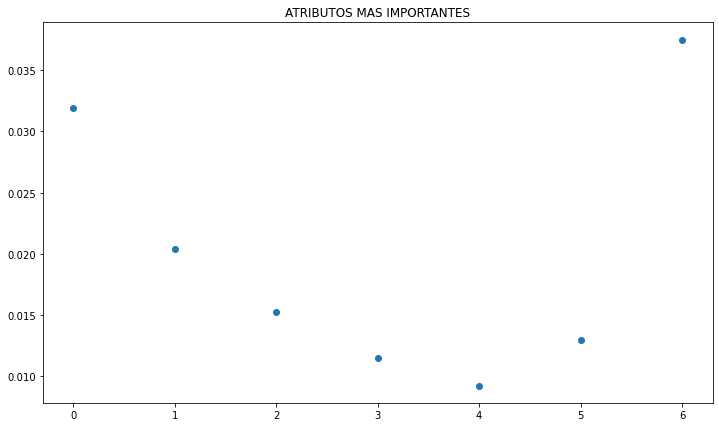

In [126]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(7),np.abs(ridge_optimizado.best_estimator_.coef_[-7:]))
plt.title('ATRIBUTOS MAS IMPORTANTES')
plt.show()

COMO PODEMOS OBSERVAR, LOS ATRIBUTOS QUE MAS IMPORTANCIA TIENEN SON LOS QUE CORRESPONDEN AL **INICIO DE AÑO TANTO COMO A FIN
DE AÑO**. EL GRAFICO ES COMO UNA CUÑA, CON DESCENDENCIA EN LA PARTE CENTRAL DEL AÑO , Y CRECE EN LOS EXTREMOS .

EN EL SEGUNDO GRÁFICO ESTAMOS OBSERVANDO LOS ÚLTIMOS SIETE DIAS, Y **VEMOS COMO EL VALOR ANTERIOR DEL AÑO, ES EL QUE MÁS IMPORTANCIA TIENE PARA LA PREDICCIÓN**

## INVESTIGACIÓN

### ME INTERESA SABER COMO ERRA MI MODELO, COMO SE COMPORTA EN TRAIN Y COMO SE COMPORTA EN TEST.

###  ¿QUE TANTO SE ASEMEJARÁ LA CURVA REAL DE LA PREDICHA? 

### ¿COMO SERÁ LA DISPERSION DE MI ERROR?

In [114]:
import seaborn as sns

In [119]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    #y_train_pred= y_train_pred.reshape(61233,1)
    #y_test_pred= y_test_pred.reshape(26244,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('distribucion de errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_train,y_train_pred,s=2)
    ax.scatter(y_test,y_test_pred, s =2)
    

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 4992.722357192496
Raíz del error cuadrático medio en Test: 5104.648426378422


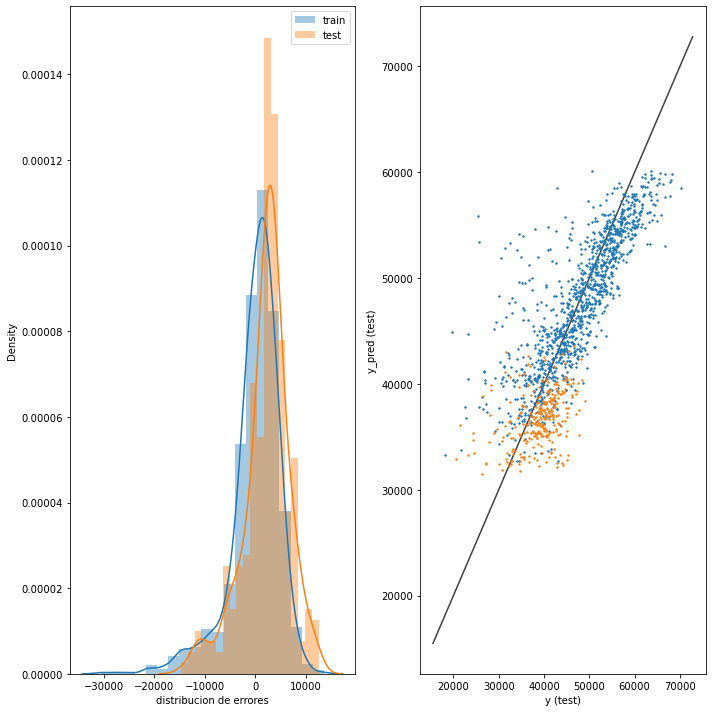

In [121]:
evaluar_regresion(ridge_optimizado, X_train, X_test, y_train, y_test) # GRAFICO MIS DATOS

* VEO QUE LOS VALORES DE OBTENIDOS EN TEST, SON MENORES QUE LOS VALORES DE TRAIN. ESTO OCURRE YA QUE MI SERIE TEMPORAL TIENE UNA TENDENCIA DESCENDIENTE, NOSOTROS ESTAMOS ENTRENANDO CON DATOS DESDE EL INICIO LOS CUALES TIENDEN A SER DECRECIENTES, POR LO TANTO MIS PREDICCIONES TIENDEN A SER MENORES. 
* TAMBIEN PUEDO OBSERVAR QUE **LA DISTRIBUCION DE EL ERROR NO ES SIMETRICA**, EL ERROR DE TEST Y DE TRAIN ESTAN SESGADO A LA DERECHA, ESTO SIGNIFICA QUE LOS ERRORES MAS GRAVES SE DAN CUANDO PREDIGO VALORES ALTOS Y EN REALIDAD FUERON VALORES MAS CHICOS. ESTO TAMBIEN LO PUEDO OBSERVAR EN EL GRÁFICO DE LA DERECHA, EN DONDE **LOS VALORES MÁS ALEJADOS DE LA LINEA RECTA, ESTAN SOBREESTIMANDO EL VALOR ORIGINAL**.
* FINALMENTE A PARTIR DE ESTOS GRÁFICOS PUEDO AFIRMAR QUE NORMALMENTE **MIS PREDICCIONES VAN A SUBESTIMAR EL VALOR ORIGINAL**, ESTO LO OBSERVO EN EL GRÁFICO DE LA DERECHA, EN DONDE TENGO MÁS ACUMULACIÓN DE DATOS DE TESTEO DEBAJO DE LA LÍNEA RECTA.
 

### PROPHET (AGREGADO)

In [133]:
diario.head()

,cantidad_pasos
fecha,
2015-01-01,25697.0
2015-01-02,38112.0
2015-01-03,27601.0
2015-01-04,33803.0
2015-01-05,48683.0


In [134]:
from prophet import Prophet
m_diario = Prophet()

In [127]:
# Prophet precisa un dataset que tenga dos columnas, una con la fecha y otra con el valor
df_prophet = pd.DataFrame()
df_prophet['ds'] = diario.index
df_prophet['y'] = diario.cantidad_pasos.values

In [128]:
m_diario.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [129]:
# Generamos Nuevamente un dataframe a futuro
future_diario = m_diario.make_future_dataframe(periods=365*10)
future_diario.tail()

,ds
5471,2029-12-24
5472,2029-12-25
5473,2029-12-26
5474,2029-12-27
5475,2029-12-28


In [130]:
# Predecimos sobre el dataset a futuro
forecast_diario = m_diario.predict(future_diario)

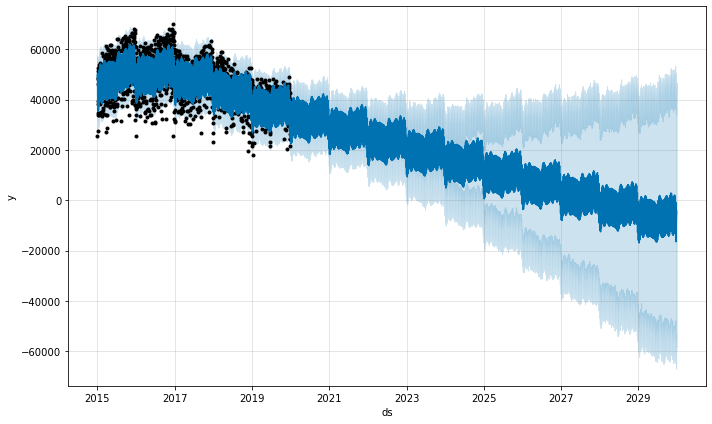

In [131]:
fig3 = m_diario.plot(forecast_diario)

VEO COMO DECRECEN LAS PREDICCIONES PARA 2019

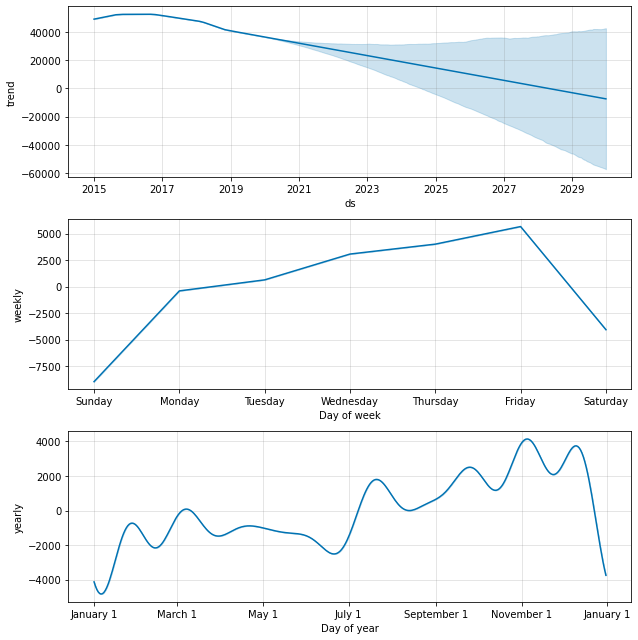

In [132]:
fig4 = m_diario.plot_components(forecast_diario)